<a href="https://colab.research.google.com/github/Khushi-Kumari947/Deep-Learning/blob/main/ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

100%|██████████| 9.64k/9.64k [00:00<00:00, 4.39MB/s]

Extracting files...


In [4]:
path

'/root/.cache/kagglehub/datasets/mohansacharya/graduate-admissions/versions/2'

In [5]:
import os
os.listdir(path)

['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv']

In [7]:
import pandas as pd
import numpy as np
df=pd.read_csv(os.path.join(path,'Admission_Predict_Ver1.1.csv'))
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
399,400,333,117,4,5.0,4.0,9.66,1,0.95
61,62,307,101,3,4.0,3.0,8.20,0,0.47
350,351,318,107,3,3.0,3.5,8.27,1,0.74
112,113,301,107,3,3.5,3.5,8.34,1,0.62
80,81,312,105,3,2.0,3.0,8.02,1,0.50


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_new=df.drop(columns=['Serial No.'],axis=1)

In [12]:
X=df_new.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [18]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [19]:
X_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [22]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [23]:
model=Sequential()

In [25]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [28]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.3492 - val_loss: 0.2600
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2388 - val_loss: 0.1552
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1474 - val_loss: 0.0832
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0816 - val_loss: 0.0423
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0456 - val_loss: 0.0248
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0291 - val_loss: 0.0207
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0228 - val_loss: 0.0204
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0214 - val_loss: 0.0197
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0190 - val_loss: 0.0178
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0166 - val_loss: 0.0157


In [29]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [30]:
y_pred

array([[1.0398012 ],
       [0.7897244 ],
       [0.47146034],
       [0.64526534],
       [0.9026421 ],
       [0.9178606 ],
       [0.31985086],
       [0.61374176],
       [0.80239254],
       [0.89980185],
       [0.6558885 ],
       [0.66063654],
       [0.8103408 ],
       [1.0717412 ],
       [0.87130064],
       [0.36743808],
       [0.94149053],
       [0.5087241 ],
       [0.41449988],
       [0.65154594],
       [0.7130812 ],
       [0.4614365 ],
       [0.6364116 ],
       [0.8332461 ],
       [0.9062532 ],
       [0.6578067 ],
       [1.0857283 ],
       [0.889639  ],
       [0.5082568 ],
       [0.75461006],
       [0.4475218 ],
       [0.6657411 ],
       [0.4805315 ],
       [0.91145587],
       [0.7122823 ],
       [0.79094756],
       [0.3538422 ],
       [1.0490125 ],
       [0.65699524],
       [0.70692986],
       [0.98295695],
       [0.5127221 ],
       [0.6230417 ],
       [0.9130878 ],
       [1.085939  ],
       [0.3996516 ],
       [1.0478218 ],
       [0.892

In [31]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)


0.695475263066138

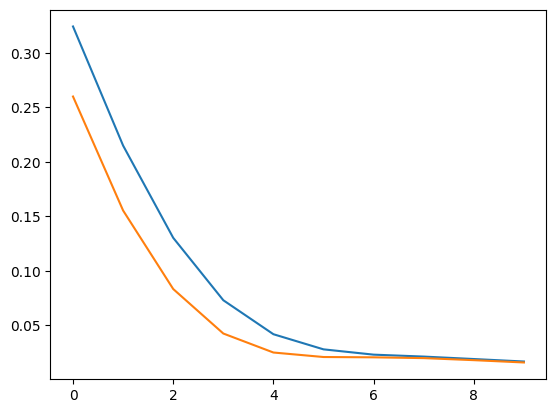

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])